In [1]:
import torch
DATA = 'Fashion'
prefix = 'fashion_bnn_'
traing = True
epochs = 400
batch_size = 64
leaks_loss = None
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Mounted at /content/gdrive


In [3]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=130a2b0135471147101ffc8f6652febf273d48062ae146641871d6bef848706c
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [14]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Fetching the dataset and preparing train, validation and test data loaders

In [5]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))


60000 7000 3000 10000


##Visualising the data

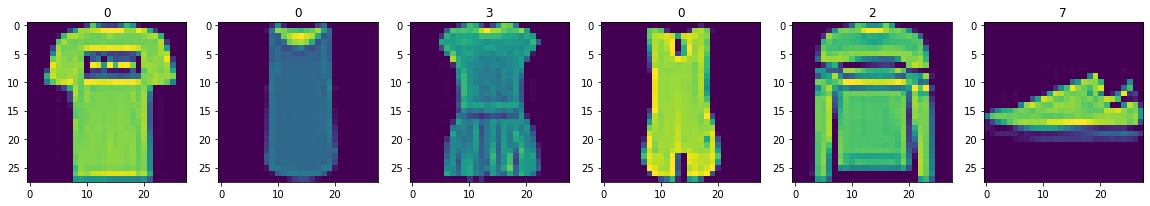

In [6]:
plot_samples(trainSet, None)

In [7]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(1, 6, 3, 1, 1), #28
            nn.BatchNorm2d(6),
            BinaryTanh(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            #nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            BinaryConv2d(6, 16, 5, 1, 0), #10
            nn.BatchNorm2d(16),
            BinaryTanh(),
            nn.MaxPool2d(2), #5
            #nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            BinaryLinear(25 * 16, 120),
            nn.BatchNorm1d(120),
            BinaryTanh(),
            #nn.Dropout(0.3),
            BinaryLinear(120, 84),
            nn.BatchNorm1d(84),
            BinaryTanh(),
            #nn.Dropout(0.2),
            BinaryLinear(84, 10)
        )

##Defining model object, loss function and optimiser

In [8]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [9]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(2)

Saving the model state dictionary for Epoch: 1 with Validation loss: 2.61144567 and Accuracy: 66.86%
Saving the model state dictionary for Epoch: 3 with Validation loss: 2.40624905 and Accuracy: 70.76%
Saving the model state dictionary for Epoch: 5 with Validation loss: 2.08944011 and Accuracy: 74.30%
Saving the model state dictionary for Epoch: 7 with Validation loss: 2.01811647 and Accuracy: 72.49%
Saving the model state dictionary for Epoch: 9 with Validation loss: 1.35909832 and Accuracy: 74.70%
Saving the model state dictionary for Epoch: 12 with Validation loss: 1.25907385 and Accuracy: 77.16%
Updating learning rate as [0.0005, 0.0005, 0.0005, 0.0005]
Saving the model state dictionary for Epoch: 101 with Validation loss: 1.10505354 and Accuracy: 80.87%
Updating learning rate as [0.00025, 0.00025, 0.00025, 0.00025]
Saving the model state dictionary for Epoch: 210 with Validation loss: 1.07732129 and Accuracy: 79.79%
Saving the model state dictionary for Epoch: 277 with Validation 

In [10]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.8261, device='cuda:0')


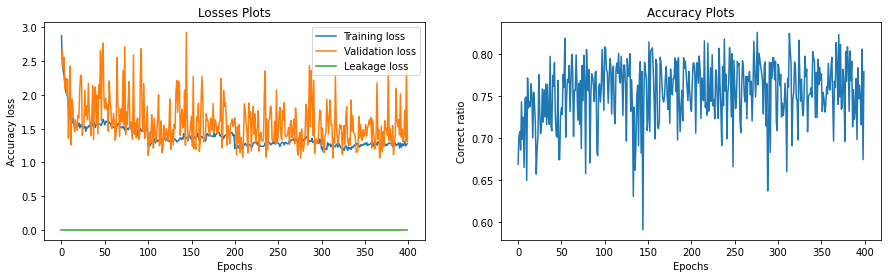

In [11]:
plot_losses()


Test accuracy: 0.8283333333333334


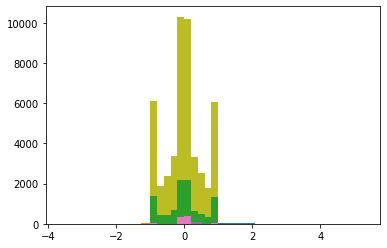

In [12]:
test_model()

##Measuring Privacy Preserving

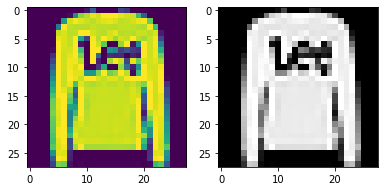

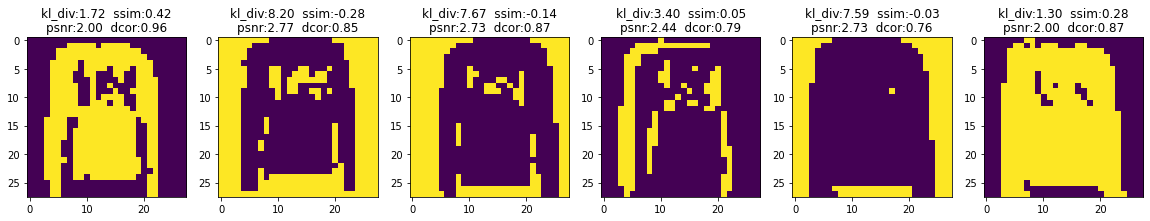

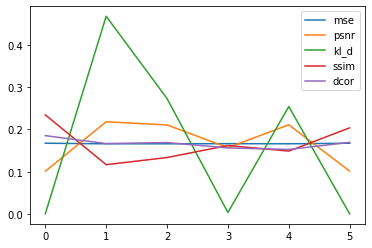

In [15]:
plot_measure(measure_image(testSet[1][0]))